In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from nltk import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
import random

In [2]:
dataset = pd.read_csv('papers_dataset.csv')
dataset.keywords = dataset.keywords.apply(ast.literal_eval)
dataset.sections = dataset.sections.apply(ast.literal_eval)

In [45]:
dataset.shape

(510, 13)

In [40]:
'''
random.seed(123)
categories = list(dataset.category.value_counts().keys())
test_set = set()
for i in categories:
    paper_titles = dataset[dataset.category == i].title.values
    test_set = test_set.union(set(random.sample(list(paper_titles), 3)))
    
dataset['partition'] = ['test' if i in test_set else 'train' for i in dataset.title.values]
dataset['paper_id'] = [f'paper_{i}' for i in range(dataset.shape[0])]
cols = list(dataset.columns[-1:]) + list(dataset.columns[:-1])
dataset = dataset[cols]
dataset.to_csv('papers_dataset.csv', index = False)
'''

In [11]:
all_sentences = []
categories = []

for row in tqdm(dataset.iterrows()):
    cat = row[1]['category']
    abstract_sents = sent_tokenize(row[1]['abstract'])
    all_sentences += abstract_sents
    categories += [cat] * len(abstract_sents)
    
    sections = list(row[1]['sections'].values())
    for section in sections:
        section_sents = sent_tokenize(section)
        all_sentences += section_sents
        categories += [cat] * len(section_sents)

510it [00:07, 71.90it/s]


In [14]:
categ_id = dict(zip(list(set(categories)), np.arange(len(list(set(categories))))))
sent_df = pd.DataFrame({'sentence': all_sentences, 'category': categories})
sent_df['categ_id'] = [categ_id[i] for i in sent_df.category.values]

In [15]:
categ_id

{'Artificial Intelligence': 0,
 'Data Mining and Knowledge Discovery': 1,
 'Machine Learning Research': 2,
 'Data Science and Analysis': 3,
 'Mathematical and Computer Modelling': 4,
 'Intelligent Information Systems': 5,
 'Control and Intelligent Systems': 6,
 'Information Science and Technology': 7,
 'Data Science and Technology': 8,
 'Computer Science and Technology': 9,
 'Neural Networks and Applications': 10,
 'Mathematics and Computer Science': 11}

In [16]:
sent_df.head()

,sentence,category,categ_id
0,Heart disease is one of the major causes of li...,Artificial Intelligence,0
1,The heart disease diagnosis and treatment are ...,Artificial Intelligence,0
2,"Inadequate preventive measures, lack of experi...",Artificial Intelligence,0
3,"Although, large proportion of heart diseases i...",Artificial Intelligence,0
4,"In today's digital world, several clinical dec...",Artificial Intelligence,0


## Read Embeddings

In [17]:
data_parts = []
for i in tqdm(range(5)):
    data = pd.read_csv(f'sentence_embeddings_{(i+1)*100}.csv')
    data_parts.append(data)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.11s/it]


In [19]:
data_df = pd.concat(data_parts, axis = 0)
data_df.sent_tr_emb = data_df.sent_tr_emb.apply(lambda x: list(np.fromstring(x[1:-1],sep=' ').astype(float)))
data_df['categ_id'] = [categ_id[i] for i in data_df.category.values]

In [20]:
data_df.shape

(68777, 5)

In [23]:
data_df.head()

,title,category,sentence,categ_id,sent_tr_emb
0,A Comprehensive Review on Heart Disease Predic...,Artificial Intelligence,Heart disease is one of the major causes of li...,0,"[0.4460226, -0.845141947, 0.146280348, -1.1929..."
1,A Comprehensive Review on Heart Disease Predic...,Artificial Intelligence,The heart disease diagnosis and treatment are ...,0,"[-0.18601216, -0.037789, 0.09992175, 0.1720532..."
2,A Comprehensive Review on Heart Disease Predic...,Artificial Intelligence,"Inadequate preventive measures, lack of experi...",0,"[-0.231186911, -0.189537778, 0.0427042805, -0...."
3,A Comprehensive Review on Heart Disease Predic...,Artificial Intelligence,"Although, large proportion of heart diseases i...",0,"[0.16552189, -0.309478015, 0.113730304, -0.397..."
4,A Comprehensive Review on Heart Disease Predic...,Artificial Intelligence,"In today's digital world, several clinical dec...",0,"[0.10223487, -0.170204878, 0.340327203, -0.030..."


In [24]:
embeddings = np.array(list(data_df.sent_tr_emb.values))

### PCA

In [25]:
pca = PCA(n_components=2)
pca_emb = pca.fit_transform(embeddings)

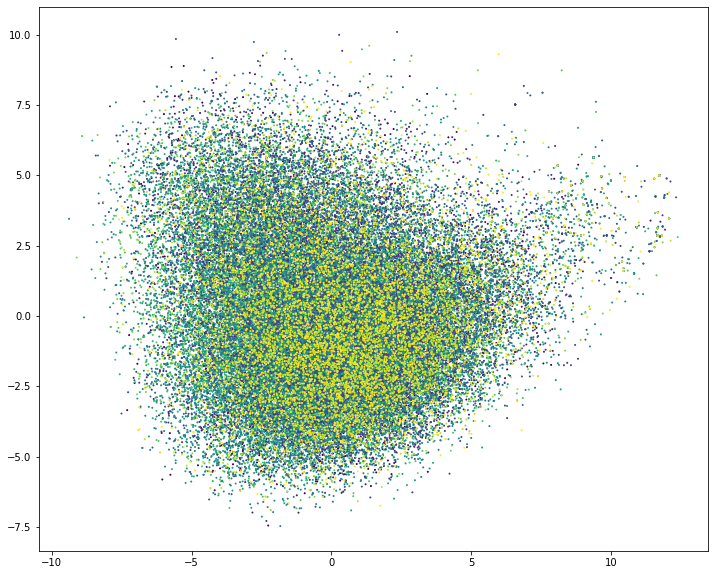

In [27]:
plt.figure(figsize = (12, 10))
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c = data_df.categ_id.values, s = 1);

### T-SNE

In [31]:
tsne = TSNE(n_components=2)
tsne_emb = tsne.fit_transform(embeddings)

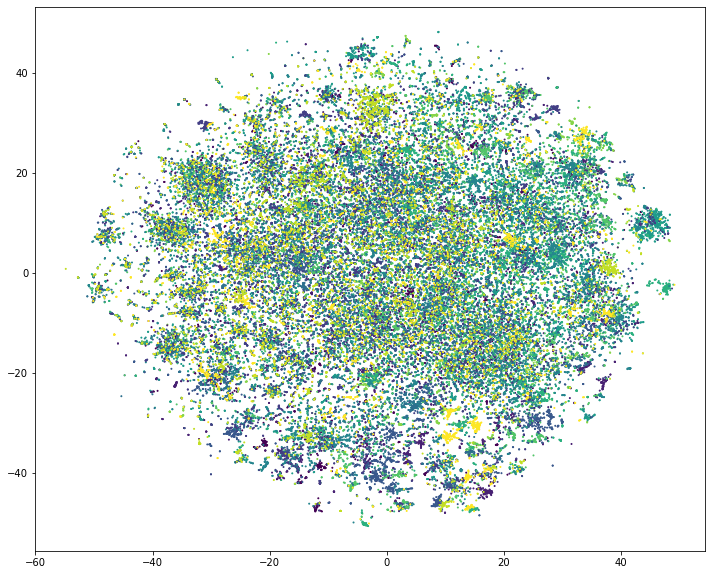

In [32]:
plt.figure(figsize = (12, 10))
plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c = data_df.categ_id.values, s = 1);